In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.lines import Line2D

For this week's #TidyTuesday I plotted the maximum age of the @DukeLemurCenter lemurs by species and sex. The difference between males and females of Varecia Varecia is striking, any ideas why?

https://github.com/gkaramanis/tidytuesday/blob/master/2021/2021-week34/lemurs.R

In [2]:
lemurs = pd.read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-24/lemur_data.csv',
    engine = "python",
    encoding = "ISO-8859-1"
)

In [3]:
taxonomy = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-24/taxonomy.csv')

In [4]:
GREY96 = "#F5F5F5"
GREY30 = "#4D4D4D"
BLUE = "#3A8AD8"
ORANGE = "#F2A039"

In [5]:
d = (
    lemurs
    .drop_duplicates(["dlc_id", "taxon", "sex", "age_max_live_or_dead_y"])
    .query("sex != 'ND'")
    .groupby(["taxon", "sex"])
    .agg(
        longev=pd.NamedAgg("age_max_live_or_dead_y", max),
        n=pd.NamedAgg("age_max_live_or_dead_y", "size")
    )
    .reset_index()
)

d = pd.pivot_table(d, index="taxon", columns="sex", values = ["longev", "n"]).reset_index()

# Join MultiIndex column names
d.columns = d.columns.map("_".join).str.strip("_")

d["color"] = np.where(d["longev_F"] > d["longev_M"], BLUE, ORANGE)
d["taxon_id"] = list(range(d.shape[0]))
d["taxon"] = np.where(d["taxon"] == "CMED", "CMEAD", d["taxon"])

In [6]:
lem_longev = pd.merge(d, taxonomy, how="left", on ="taxon")

In [73]:
def scale(x, x_min=None, x_max=None, lower=0, upper=1):
    if x_min is None:
        x_min = np.min(x)
    if x_max is None:
        x_max = np.max(x)
    return (x - x_min) / (x_max - x_min) * (upper - lower) + lower

In [8]:
f1 = "Fira Sans Compressed"
f2 = "Faune"
col_bg = "grey96"

In [74]:
longev_F = lem_longev["longev_F"].values
longev_M = lem_longev["longev_M"].values
color = lem_longev["color"].values

n_lemurs_min = min(np.min(lem_longev["n_F"]), np.min(lem_longev["n_M"]))
n_lemurs_max = max(np.max(lem_longev["n_F"]), np.max(lem_longev["n_M"]))

lower = 10
upper = 100

n_F = scale(lem_longev["n_F"].values, n_lemurs_min, n_lemurs_max, lower, upper)
n_M = scale(lem_longev["n_M"].values, n_lemurs_min, n_lemurs_max, lower, upper)

names = lem_longev["latin_name"].values

In [71]:
n_lemurs_max

118

In [75]:
vertical_adjustments = {
    "Varecia rubra": 0,
    "Daubentonia madagascariensis": 0.6,
    "Eulemur macaco": 0.6,
    "Eulemur rubriventer": 0.4,
    "Eulemur sanfordi": 0.5,
    "Eulemur collaris": -0.1,
    "Perodicticus potto": -0.6,
    "Lemur catta": 0,
    "Eulemur flavifrons": 0,
    "Nycticebus coucang": 0,
    "Otolemur garnettii garnettii": 0,
    "Mircocebus murinus": 0,
    "Galago moholi": 0,
    "Varecia variegata variegata": 0,
    "Eulemur mongoz": 0,
    "Eulemur fulvus": 0,
    "Eulemur rufus": 0,
    "Propithecus coquereli": 0.3,
    "Cheirogaleus medius": 0.3,
    "Eulemur Eulemur": -0.1,
    "Eulemur coronatus": -0.35,
    "Eulemur albifrons": -0.25,
    "Hapalemur griseus griseus": 0,
    "Loris tardigradus": 0,
    "Mirza coquereli": 0,
    "Varecia Varecia": 0,
    "Nycticebus pygmaeus": 0
}

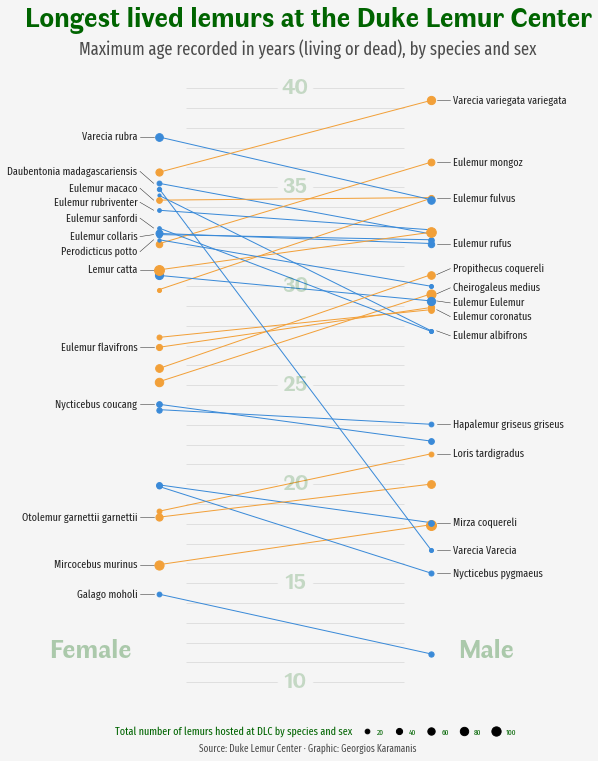

In [104]:
fig, ax = plt.subplots(figsize = (9, 11))

fig.subplots_adjust(left=0.06, right=0.90, top=0.9, bottom=0.075)

for y0, y1, c, s0, s1 in zip(longev_F, longev_M, color, n_F, n_M):
    ax.plot([1, 2], [y0, y1], c=c, lw=1)
    ax.scatter(1, y0, c = c, s=s0, zorder=10)
    ax.scatter(2, y1, c = c, s=s1, zorder=10)

ax.set_xlim(0.5, 2.5)

TEXT_HPADDING = 0.08
LINE_HPADDING = 0.02

for i, name in enumerate(names):
    if i % 2 != 0:
        VA = vertical_adjustments[name]
        ax.text(
            1 - TEXT_HPADDING, 
            longev_F[i] + VA, 
            name, 
            ha="right", 
            va="center", 
            size=11, 
            fontname="Fira Sans Compressed", 
            color="0.15"
        )
        ax.plot(
            [1 - 0.07, 1 - LINE_HPADDING], 
            [longev_F[i] + VA, longev_F[i]], 
            color="0.15", 
            lw=0.5
        )
    else:
        VA = vertical_adjustments[name]
        ax.text(
            2 + TEXT_HPADDING, 
            longev_M[i] + VA, 
            name, 
            va="center", 
            size=11, 
            fontname="Fira Sans Compressed",
            color="0.15"
        )
        ax.plot(
            [2 + LINE_HPADDING, 2 + 0.07], 
            [longev_M[i], longev_M[i] + VA], 
            color="0.15", 
            lw=0.5
        )

    
# Horizontal lines in the background
ax.hlines(np.arange(10, 41), 1.1, 1.9, alpha=0.2, lw=0.5, color="0.15", zorder=0)

#ax.set_axisbelow(True)

# Dots that act as background for the labels
for y in np.arange(10, 45, 5):
    ax.scatter(1.5, y, s=1200, color="0.96")
    ax.text(
        1.5, y, str(y), 
        size=22, color="darkgreen", weight="bold", alpha=0.2,
        name="Faune", va="center", ha="center"
    )


ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])


ax.text(
    0.9, 11.25, "Female", 
    name="Faune", 
    size=27, 
    color="darkgreen", 
    weight="bold", 
    alpha=0.3,
    ha="right"
)

ax.text(
    2.1, 
    11.25, 
    "Male", 
    name="Faune", 
    size=27, 
    color="darkgreen", 
    weight="bold", 
    alpha=0.3,
    ha="left"
)

fig.text(
    0.5, 0.94, "Longest lived lemurs at the Duke Lemur Center",
    size=28,
    name="Faune",
    weight="bold",
    ha="center",
    color="darkgreen",
)

fig.text(
    0.5, 0.905, "Maximum age recorded in years (living or dead), by species and sex",
    size=18,
    name="Fira Sans Compressed",
    color="0.3",
    ha="center",
)

fig.text(
    0.5, 0.025, "Source: Duke Lemur Center · Graphic: Georgios Karamanis",
    size=10, 
    color="0.3", 
    family="Fira Sans Compressed", 
    ha="center"
)

labels = np.array([20, 40, 60, 80, 100])
sizes = scale(labels, n_lemurs_min, n_lemurs_max, lower, upper)

#Create handles for lines.
handles = [Line2D([], [], label="Total number of lemurs hosted at DLC by species and sex", lw=0)]
handles += [
    Line2D(
        [], 
        [], 
        label=str(label), 
        lw=0, 
        color="None",
        marker="o",
        markersize=np.sqrt(size),
        markerfacecolor="black"
    )
    for label, size in zip(labels, sizes)
]


legend = fig.legend(
    handles=handles,
    bbox_to_anchor=[0.5, 0.05],
    handletextpad=0.5,
    handlelength=1, 
    columnspacing=1,
    loc="center", 
    ncol=6,
    frameon=False
)

for i, text in enumerate(legend.get_texts()):
    text.set_fontfamily("Fira Sans Compressed")
    text.set_color("darkgreen")
    if i == 0:
        text.set_fontsize(11)
    else:
        text.set_fontsize(8)

fig.set_facecolor("0.96")
fig.savefig("plot.png", dpi=320)